In [520]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [521]:
df = pd.read_csv(r'C:\Users\User\Desktop\sql practice\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [522]:
df.shape

(8807, 12)

In [523]:
#Check for duplicated rows
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

In [524]:
#Check missing Values
missing_values = df.isna().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [526]:
# Trim spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [527]:
# Trim spaces from all string data in the DF
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [528]:
#Handle missing values
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Not Available',inplace=True)
df['country'].fillna('Not Available',inplace=True)

In [529]:
#Check missing Values
missing_values = df.isna().sum()
missing_values

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [530]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [531]:
df['date_added'].fillna('Not Available', inplace=True)

In [532]:
#Check missing Values
missing_values = df.isna().sum()
missing_values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [533]:
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Not Available', inplace=True)

In [534]:
#Check missing Values
missing_values = df.isna().sum()
missing_values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [535]:
#Check Data Types:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [536]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Not Available,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


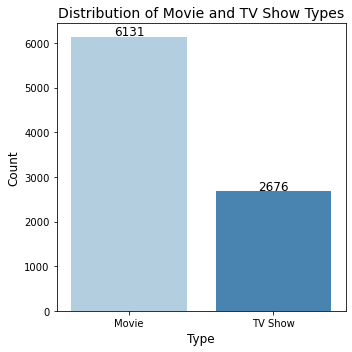

In [538]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='type', data=df, palette='Blues')

# Adding data labels on the bars
for p in ax.patches:
    height = int(p.get_height())  # Convert height to an integer
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


# Step 2: Add labels and title
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Movie and TV Show Types', fontsize=14)

# Step 3: Show the plot
plt.tight_layout()
plt.show()


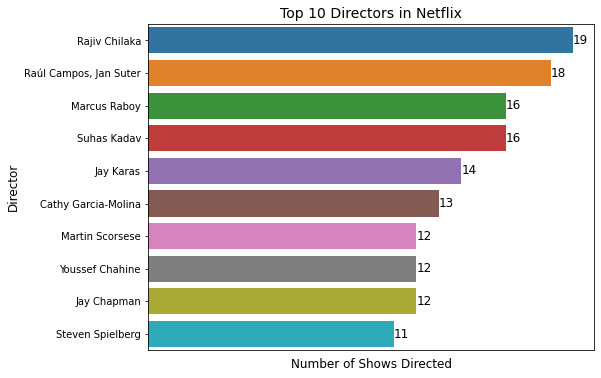

In [539]:
# Remove rows where the director is 'unknown' or NaN
filtered_df = df[df['director'].str.lower()!= 'unknown']

top_directors = filtered_df['director'].value_counts().head(10)


# Horizontal bar plot of the top 10 directors
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_directors.values, y=top_directors.index)

# Adding data labels on the bars
for p in ax.patches:
    width = int(p.get_width())  # Convert to integer to remove decimal places from data label
    ax.annotate(f'{width}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=12, color='black')
    
# Remove the x-axis values (ticks)
plt.xticks([])

plt.title('Top 10 Directors in Netflix', fontsize=14)
plt.xlabel('Number of Shows Directed', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()


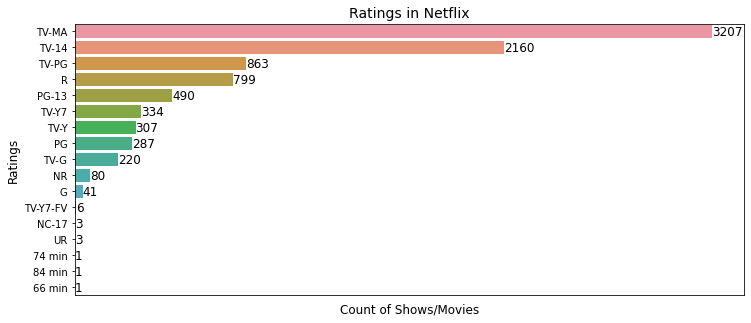

In [540]:
#Distribution of 'rating'

df_filtered = df[df['rating'].str.lower() != "not rated"]


rating_counts = df_filtered['rating'].value_counts()
plt.figure(figsize=(12, 5))

ax = sns.barplot(x=rating_counts.values, y=rating_counts.index)

# Adding data labels on the bars
for p in ax.patches:
    width = int(p.get_width())  # Convert to integer to remove decimal places from data label
    ax.annotate(f'{width}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=12, color='black')
    
# Remove the x-axis values (ticks)
plt.xticks([])

plt.title('Ratings in Netflix', fontsize=14)
plt.xlabel('Count of Shows/Movies', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.show()

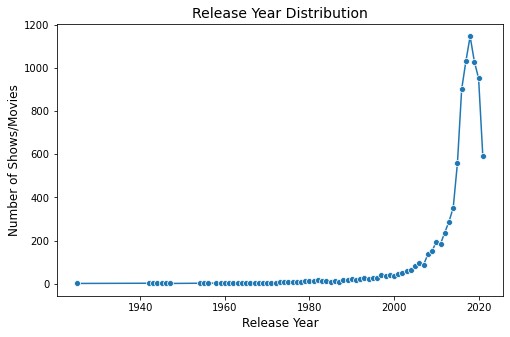

In [541]:

# Group by 'release_year' and count the number of occurrences per year
release_year_counts = df['release_year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, marker='o')

# Set titles and labels
plt.title('Release Year Distribution', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Shows/Movies', fontsize=12)

plt.show()

In [542]:
# Move the 'duration' values for TV Shows into a new column 'tv_show_duration'
df['tv_show_duration'] = df.apply(lambda row: row['duration'] if row['type'] == 'TV Show' else "Not Applicable", axis=1)

In [543]:
# Set the 'duration' column to None for TV Shows
df['duration'] = df.apply(lambda row: "Not Applicable" if row['type'] == 'TV Show' else row['duration'], axis=1)


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tv_show_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Not Applicable
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,Not Applicable,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021-09-24,2021,TV-MA,Not Applicable,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1 Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Not Available,2021-09-24,2021,TV-MA,Not Applicable,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1 Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,Not Applicable,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2 Seasons


In [544]:
df.to_csv(r'C:\Users\User\Desktop\P\netflix_titles_110125.csv')

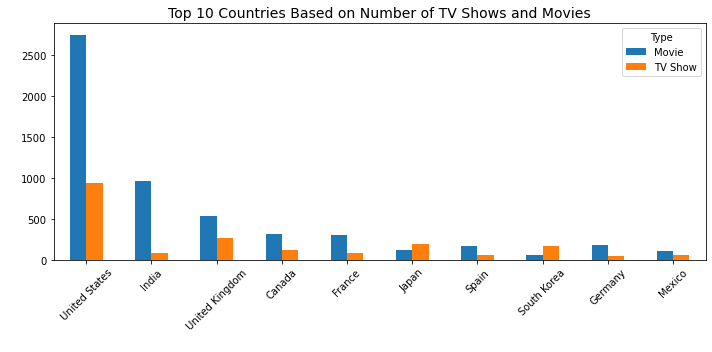

In [545]:
# Split the 'country' column by commas and expand the result into individual rows
df_exploded = df['country'].str.split(',', expand=True).stack().reset_index(drop=True)

# Create a new DataFrame with the country column exploded
df_exploded = pd.DataFrame(df_exploded, columns=['country'])

# Clean up spaces (strip extra spaces) and exclude "Not Applicable"
df_exploded['country'] = df_exploded['country'].str.strip()

# Exclude "Not Applicable" or any other undesired values
df_exploded = df_exploded[df_exploded['country'].str.lower() != 'not available']

# Add the type information to the exploded DataFrame by repeating the type values
df_exploded['type'] = df['type'].repeat(df['country'].str.split(',').apply(len)).reset_index(drop=True)

# Count the occurrences of TV Shows and Movies by country
country_counts = df_exploded.groupby(['country', 'type']).size().unstack(fill_value=0)

# Sum the counts across both TV Shows and Movies for each country
country_counts['total'] = country_counts.sum(axis=1)

# Sort the countries by total count (descending) and take the top 10
top_10_countries = country_counts.sort_values(by='total', ascending=False).head(10)

# Plotting the grouped bar chart for the top 10 countries
top_10_countries.drop('total', axis=1).plot(kind='bar', figsize=(10, 5))

# Add labels and title
plt.title('Top 10 Countries Based on Number of TV Shows and Movies', fontsize=14)
plt.xlabel(' ')
plt.ylabel(' ')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the legend and plot
plt.legend(title='Type', labels=['Movie', 'TV Show'], loc='upper right')
plt.tight_layout()
plt.show()

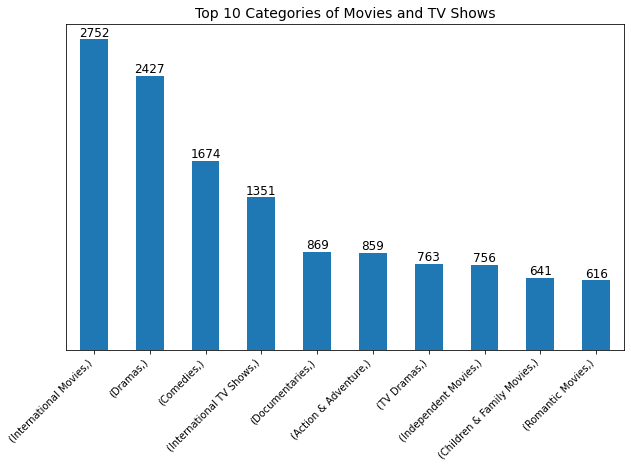

In [546]:
#Split the 'listed_in' column by commas and expand the result into individual rows
df_exploded = df['listed_in'].str.split(',', expand=True).stack().reset_index(drop=True)

#Create a new DataFrame with the category column exploded
df_exploded = pd.DataFrame(df_exploded, columns=['category'])

#Clean up spaces (strip extra spaces)
df_exploded['category'] = df_exploded['category'].str.strip()

#Count the occurrences of each category (top 10 most frequent categories)
category_counts = df_exploded.value_counts().head(10)

#Plot the top 10 categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')

# Add labels and title
plt.title('Top 10 Categories of Movies and TV Shows', fontsize=14)
plt.xlabel('')


# Adding data labels on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',  # Display the count without decimal places
                       (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the label
                       ha='center', va='bottom', fontsize=12, color='black')  # Position and style of the label
    
# Move the x-axis labels to the left by setting horizontal alignment to 'right'
plt.xticks(rotation=45, ha='right')
plt.yticks([])

# Show the plot
plt.show()

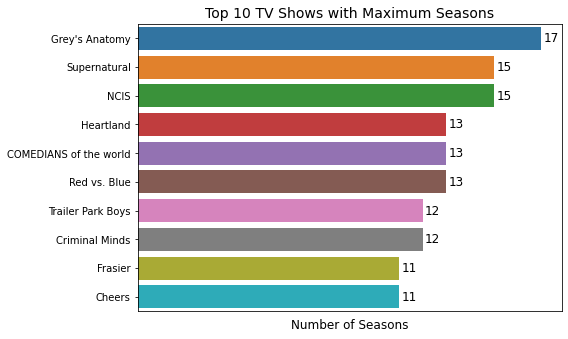

In [561]:
# Step 1: Remove rows with 'Not applicable' in the t_show_duration column
df = df[df['tv_show_duration'].str.lower() != 'not applicable']

# Step 2: Extract the numeric part (number of seasons) from the t_show_duration column
df['seasons'] = df['tv_show_duration'].str.extract('(\d+)').astype(int)

# Step 3: Sort by the number of seasons in descending order and select the top 10
top_shows = df.sort_values(by='seasons', ascending=False).head(10)

# Step 4: Plot the result using seaborn (barplot)
plt.figure(figsize=(8, 5))
sns.barplot(x='seasons', y='title', data=top_shows)

# Adding data labels on the bars
for i in range(len(top_shows)):
    plt.text(top_shows['seasons'].iloc[i] + 0.1, i, f'{top_shows["seasons"].iloc[i]}', va='center', fontsize=12)

# Add labels and title
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('')
plt.title('Top 10 TV Shows with Maximum Seasons', fontsize=14)
plt.tight_layout()

plt.xticks([])

# Show the plot
plt.show()